<a href="https://colab.research.google.com/github/escape13/deepfried/blob/master/IntroTorch/ClothingRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms
from torch import optim

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,), (0.5))])
trainset = datasets.FashionMNIST('FashionMNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [14]:
images, labels = next(iter(trainloader))

model = nn.Sequential(nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 128),
                    nn.ReLU(),
                    nn.Linear(128, 10),
                    nn.LogSoftmax())

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.025)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        images = images.view(images.shape[0], -1)
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Training loss: 0.7262933598334855
Training loss: 0.4644642514365314
Training loss: 0.4179143816200909
Training loss: 0.387621692232867
Training loss: 0.36666655826416095


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


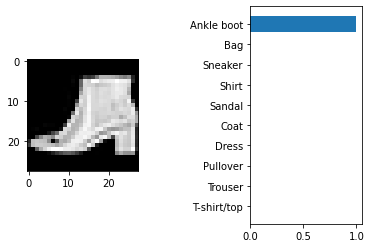

In [67]:
import matplotlib.pyplot as plt

images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

with torch.no_grad():
    output = model.forward(img)

probs = F.softmax(output, dim=1)

plt.subplot(1, 2, 1)
plt.imshow(images[0].numpy().squeeze(), cmap='gray')
plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace=1)
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.barh(names, probs.numpy().squeeze())
plt.yticks(range(10))
plt.show()